In [25]:
import sys, os, glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
from astropy import table

from jwst_kernels.make_kernels import make_jwst_cross_kernel, make_jwst_kernel_to_Gauss,plot_kernel
from jwst_kernels.evaluate_kernels import find_safe_kernel, plot_evaluate

%matplotlib inline

**Example of JWST kernel construction** 

Generate a kernel to go from two arbirtary JWST bands, here choosing MIRI F770W and F2100W.

The JWST PSF can be given to the function via a path, supplied in the data directory of the package, or generated on the fly (if webbpsf is installed). 


In [26]:
input_filter = {'camera':'MIRI', 'filter':'F770W'}
target_filter = {'camera':'MIRI', 'filter':'F2100W'}

kk = make_jwst_cross_kernel(input_filter, target_filter, psf_dir=None, outdir=None, detector_effects=True)

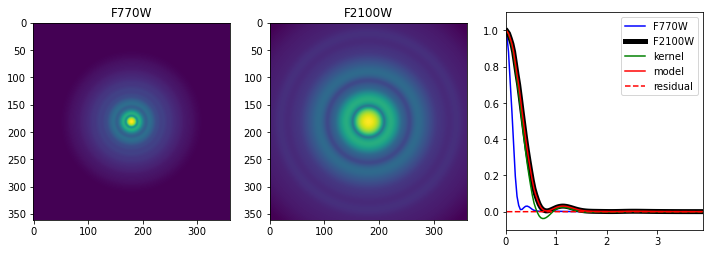

In [27]:
plot_kernel(kk,save_plot=False)

Generate a kernel to go from a JWST band to a Gaussian with an arbitrary PSF. Here doing MIRI F2100W to Gaussian with FWHM of 1.5''.

In [28]:
input_filter = {'camera':'MIRI', 'filter':'F2100W'}
target_gaussian = {'fwhm':1.5}

kk = make_jwst_kernel_to_Gauss(input_filter, target_gaussian,psf_dir=None, outdir=None, detector_effects=True)

/Volumes/fbdata3/CODE/JWST/jwst_kernels/src/jwst_kernels/make_kernels.py:188: RuntimeWarning: divide by zero encountered in log10
  ax2.imshow(np.log10(kk.target_psf/np.max(kk.target_psf)), vmax=0, vmin=-4);
/Volumes/fbdata3/CODE/JWST/jwst_kernels/src/jwst_kernels/kernel_core.py:35: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(dis, bins)[0])


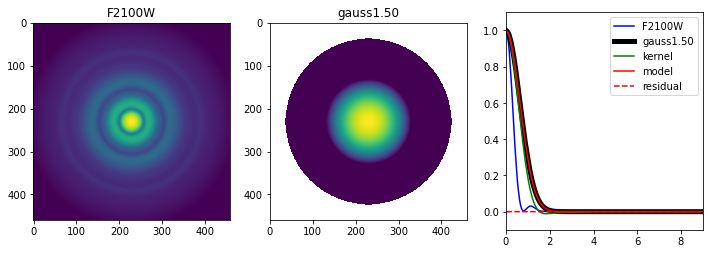

In [29]:
plot_kernel(kk,save_plot=False)

**Determine the smallest "safe" Gaussian PSF for each JWST band** 

Determine the kernel needed to convert to the smallest safe Gaussian PSF according to the Aniano+2011 paper.

Here test the NIRCam F200W filter.

In [30]:
input_filter = {'camera':'NIRCam', 'filter':'F200W'}
out = find_safe_kernel(input_filter, detector_effects=True)

Wm, very safe 0.093", safe 0.077", aggressive 0.069", source 0.064" 
D, very safe 0.03, safe 0.06, aggressive 0.13


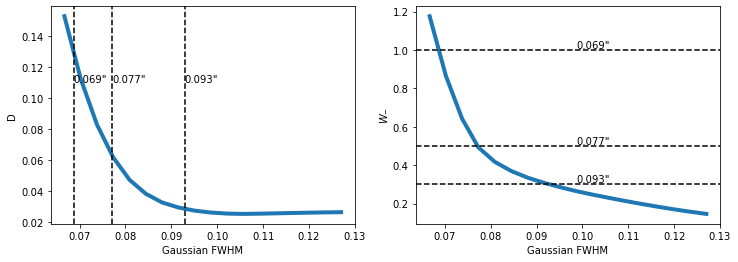

In [31]:
plot_evaluate(out['source_fwhm'], out['target_fwhm'], out['D_v'], out['Wm_v'] )

In [32]:
print(out['very_safe'], out['safe'], out['aggressive'])

0.0928903397437942 0.07714312903104625 0.06868484130471635
